In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback

In [2]:
script_file_path = os.getcwd()

In [3]:
print(script_file_path)

/mnt/DATA/projects/signals/Second Dataset collected on 16 December 2020/Pre-processed file


In [6]:
path_First_sticker= '../../Second Dataset collected on 16 December 2020/Pre-processed file/First_Sticker'

In [9]:
First_Sticker_BackgroundRFactivities = pd.read_csv(path_First_sticker+'/BackgroundRFactivities.csv')
First_Sticker_Connected = pd.read_csv(path_First_sticker+'/Connected.csv')
First_Sticker_Searching = pd.read_csv(path_First_sticker+'/Searching.csv')
First_Sticker_Searching_without_connected = pd.read_csv(path_First_sticker+'/Searching with wifi established.csv')

In [10]:
First_Sticker_BackgroundRFactivities

,Version,0.3
0,-2.229000e-05,0.000034
1,2.651000e-05,0.000030
2,-1.308000e-05,-0.000044
3,-5.200000e-07,-0.000024
4,7.710000e-05,-0.000012
...,...,...
7795995,4.088000e-05,-0.000022
7795996,-3.237000e-05,0.000016
7795997,-3.543000e-05,0.000034
7795998,1.330000e-06,-0.000035


In [11]:
# Renaming the Title of each coloum 

First_Sticker_BackgroundRFactivities=First_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Connected=First_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching=First_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching_without_connected=First_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

print(type(First_Sticker_BackgroundRFactivities))

<class 'pandas.core.frame.DataFrame'>


In [18]:
NUMBER_OF_FEATURES=3387

In [12]:
First_Sticker_BackgroundRFactivities

,I_Data,Q_Data
0,-2.229000e-05,0.000034
1,2.651000e-05,0.000030
2,-1.308000e-05,-0.000044
3,-5.200000e-07,-0.000024
4,7.710000e-05,-0.000012
...,...,...
7795995,4.088000e-05,-0.000022
7795996,-3.237000e-05,0.000016
7795997,-3.543000e-05,0.000034
7795998,1.330000e-06,-0.000035


In [20]:
# converting Pandas to Numpy for easier plotting
First_Sticker_BackgroundRFactivities_numpy = First_Sticker_BackgroundRFactivities[0:7793487].to_numpy()
First_Sticker_Connected_numpy = First_Sticker_Connected[0:7793487].to_numpy()
First_Sticker_Searching_numpy = First_Sticker_Searching[0:7793487].to_numpy()
First_Sticker_Searching_without_connected_numpy = First_Sticker_Searching_without_connected[0:7793487].to_numpy()

In [21]:
I_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,1]

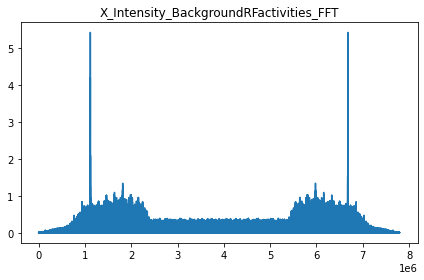

In [22]:
I_Data_First_BackgroundRFactivities_FFT = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities_FFT = First_Sticker_BackgroundRFactivities_numpy[0:,1]


X_Intensity_BackgroundRFactivities_FFT = abs(np.fft.fftshift(fft(I_Data_First_BackgroundRFactivities_FFT[:]-np.mean(I_Data_First_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Intensity_BackgroundRFactivities_FFT)
plt.title("X_Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

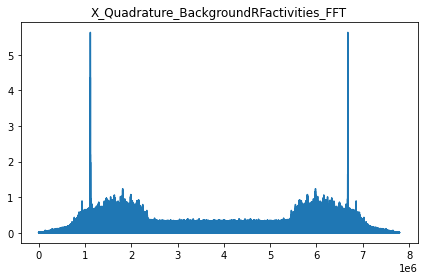

In [23]:
X_Quadrature_BackgroundRFactivities_FFT = abs(np.fft.fftshift(fft(Q_Data_First_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_First_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT)
plt.title("X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

In [25]:
I_Data_First_BackgroundRFactivities= I_Data_First_BackgroundRFactivities.reshape(2301,NUMBER_OF_FEATURES)
Q_Data_First_BackgroundRFactivities= Q_Data_First_BackgroundRFactivities.reshape(2301,NUMBER_OF_FEATURES)

Concatenate_IQ_First_BackgroundRFactivities_2Dim = np.concatenate((I_Data_First_BackgroundRFactivities,Q_Data_First_BackgroundRFactivities),axis=1)


In [26]:
Concatenate_IQ_First_BackgroundRFactivities_2Dim.shape

(2301, 6774)

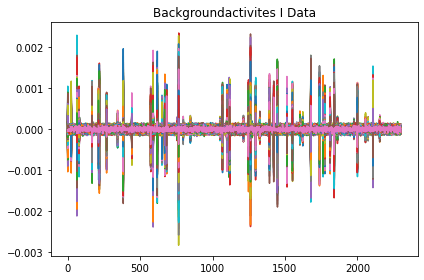

In [27]:
plt.plot(I_Data_First_BackgroundRFactivities)
plt.title("Backgroundactivites I Data")
plt.tight_layout()
plt.show()

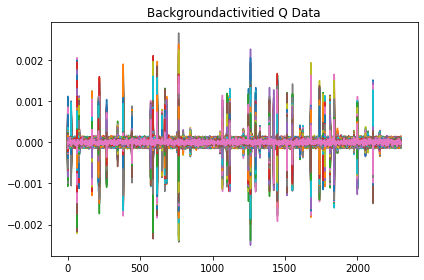

In [28]:
plt.plot(Q_Data_First_BackgroundRFactivities)
plt.title("Backgroundactivitied Q Data")
plt.tight_layout()
plt.show()


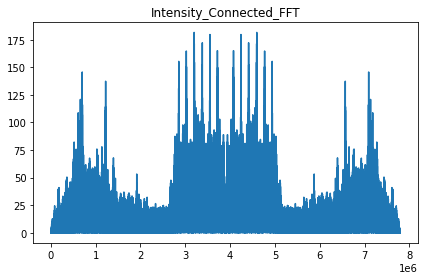

In [29]:
I_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected = abs(np.fft.fftshift(fft(I_Data_First_Connected_FFT[:]-np.mean(I_Data_First_Connected_FFT[:]))))
plt.plot(X_Intensity_FFT_Connected )
plt.title("Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

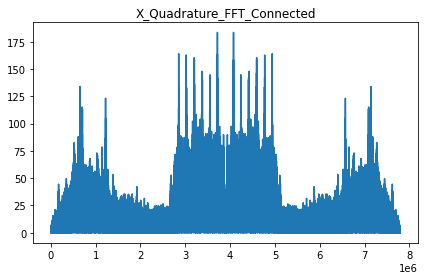

In [30]:
X_Quadrature_FFT_Connected = abs(np.fft.fftshift(fft(Q_Data_First_Connected_FFT[:]-np.mean(Q_Data_First_Connected_FFT[:]))))
plt.plot(X_Quadrature_FFT_Connected )
plt.title("X_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

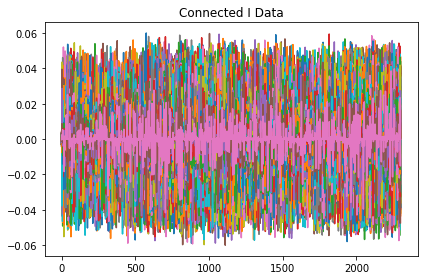

In [32]:
I_Data_First_Connected = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected = First_Sticker_Connected_numpy[0:,1]

I_Data_First_Connected= I_Data_First_Connected.reshape(2301,NUMBER_OF_FEATURES)
Q_Data_First_Connected= Q_Data_First_Connected.reshape(2301,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Connected_2Dim = np.concatenate((I_Data_First_Connected,Q_Data_First_Connected),axis=1)

plt.plot(I_Data_First_Connected[0:])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

In [33]:
Concatenate_IQ_First_Connected_2Dim.shape

(2301, 6774)

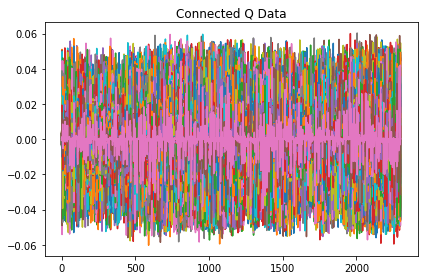

In [34]:
plt.plot(Q_Data_First_Connected[0:3877])
plt.title("Connected Q Data")
plt.tight_layout()
plt.show()

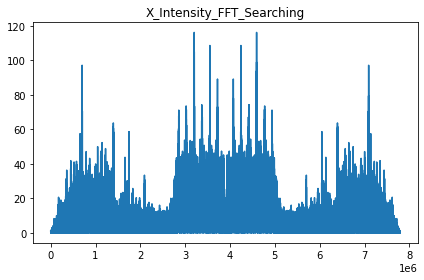

In [35]:
I_Data_First_Searching_FFT = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching_FFT = First_Sticker_Searching_numpy[0:,1]


X_Intensity_FFT_Searching = abs(np.fft.fftshift(fft(I_Data_First_Searching_FFT[:]-np.mean(I_Data_First_Searching_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching )
plt.title("X_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

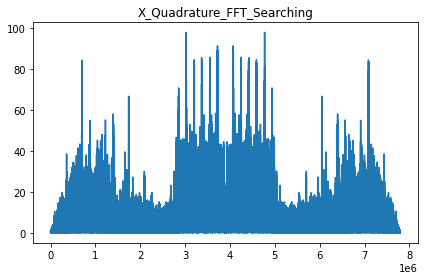

In [36]:
X_Quadrature_FFT_Searching = abs(np.fft.fftshift(fft(Q_Data_First_Searching_FFT[:]-np.mean(Q_Data_First_Searching_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching )
plt.title("X_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

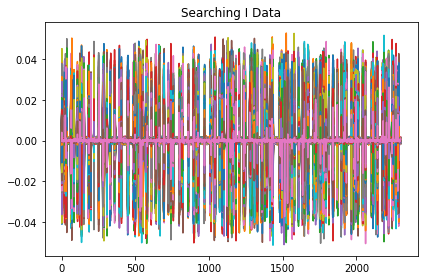

In [37]:
I_Data_First_Searching = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching = First_Sticker_Searching_numpy[0:,1]

I_Data_First_Searching= I_Data_First_Searching.reshape(2301,NUMBER_OF_FEATURES)
Q_Data_First_Searching= Q_Data_First_Searching.reshape(2301,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Searching_2Dim = np.concatenate((I_Data_First_Searching,Q_Data_First_Searching),axis=1)


plt.plot(I_Data_First_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

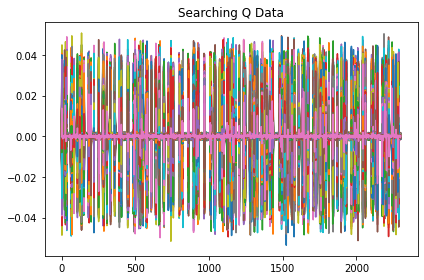

In [38]:
plt.plot(Q_Data_First_Searching[0:3877])
plt.title("Searching Q Data")
plt.tight_layout()
plt.show()

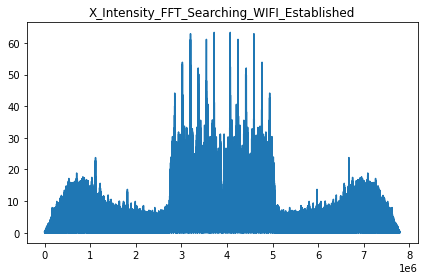

In [39]:
I_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established = abs(np.fft.fftshift(fft(I_Data_First_Searching_WIFI_established_FFT[:]-np.mean(I_Data_First_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_WIFI_established )
plt.title("X_Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

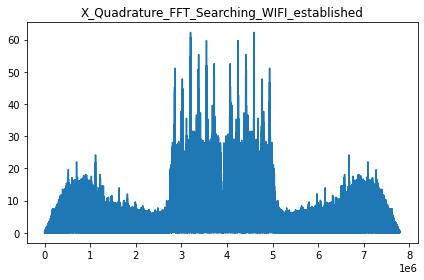

In [40]:
X_Quadrature_FFT_Searching_WIFI_established = abs(np.fft.fftshift(fft(Q_Data_First_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_First_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established )
plt.title("X_Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

In [43]:
I_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,1]

I_Data_First_Searching_WIFI_established= I_Data_First_Searching_WIFI_established.reshape(2301,NUMBER_OF_FEATURES)
Q_Data_First_Searching_WIFI_established= Q_Data_First_Searching_WIFI_established.reshape(2301,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Searching_WIFI_established_2Dim = np.concatenate((I_Data_First_Searching_WIFI_established,Q_Data_First_Searching_WIFI_established),axis=1)


In [44]:
Concatenate_IQ_First_Searching_WIFI_established_2Dim.shape

(2301, 6774)

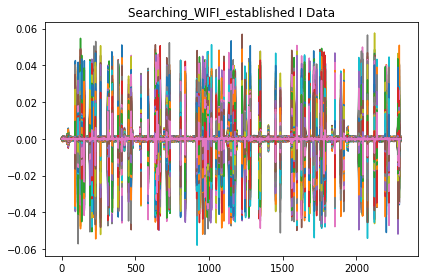

In [45]:
plt.plot(I_Data_First_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established I Data")
plt.tight_layout()
plt.show()